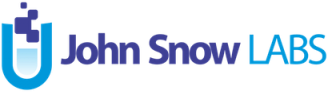

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/Medical_Datasets)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install langtest["transformers","ai21","openai"]

## Initial setup

In [ ]:
import os

os.environ["AI21_API_KEY"] = "AI21_API_KEY"
os.environ["OPENAI_API_KEY"] = "OPENAI_API_KEY"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [ ]:
# Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - |
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

## MedMCQA  
[MedMCQA: A Large-scale Multi-Subject Multi-Choice Dataset for Medical domain Question Answering](https://proceedings.mlr.press/v174/pal22a)

**Dataset Summary**

The MedMCQA is a large-scale benchmark dataset of Multiple-Choice Question Answering (MCQA) dataset designed to address real-world medical entrance exam questions.

| subsets       | Details                                                                                                                                                                                                           |
|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **MedMCQA-Test**    | This dataset does not contain labels, so accuracy and fairness tests cannot be run on it. Only robustness tests can be applied.                             |
| **MedMCQA-Validation** | This dataset does contain labels, enabling the execution of robustness, accuracy, and fairness tests. |


Both the subset contains the following splits:

- Anaesthesia
- Anatomy
- Biochemistry
- Dental
- ENT
- Forensic_Medicine
- Gynaecology_Obstetrics
- Medicine
- Microbiology
- Ophthalmology
- Pathology
- Pediatrics
- Pharmacology
- Physiology
- Psychiatry
- Radiology
- Skin
- Social_Preventive_Medicine
- Surgery
- Unknown

we are going to use one of the split from this Dataset to demonstrate in this notebook

### Setup and Configure Harness

In [ ]:
harness = Harness(
    task="question-answering",
    model={"model": "gpt-3.5-turbo-instruct", "hub": "openai"},
    data={"data_source": "MedMCQA",
          "subset": "MedMCQA-Test",
          "split": "Radiology"}
)

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [ ]:
harness.configure(
    {
        "evaluation": {"metric": "QAEvalChain", "model": "gpt-3.5-turbo-instruct", "hub": "openai"},
        'tests': {'defaults': {'min_pass_rate': 0.65},
                  'robustness': {'uppercase': {'min_pass_rate': 0.75},
                                 'lowercase': {'min_pass_rate': 0.75},
                                 'titlecase': {'min_pass_rate': 0.75},
                                 'add_typo': {'min_pass_rate': 0.75},
                                 'dyslexia_word_swap': {'min_pass_rate': 0.75},
                                 'add_abbreviation': {'min_pass_rate': 0.75},
                                 'add_slangs': {'min_pass_rate': 0.75},
                                 'add_speech_to_text_typo': {'min_pass_rate': 0.75},
                                 'add_ocr_typo': {'min_pass_rate': 0.75},
                                 'adjective_synonym_swap': {'min_pass_rate': 0.75},
                                 }
                  }
    }
)

{'evaluation': {'metric': 'QAEvalChain',
  'model': 'gpt-3.5-turbo-instruct',
  'hub': 'openai'},
 'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.75},
   'lowercase': {'min_pass_rate': 0.75},
   'titlecase': {'min_pass_rate': 0.75},
   'add_typo': {'min_pass_rate': 0.75},
   'dyslexia_word_swap': {'min_pass_rate': 0.75},
   'add_abbreviation': {'min_pass_rate': 0.75},
   'add_slangs': {'min_pass_rate': 0.75},
   'add_speech_to_text_typo': {'min_pass_rate': 0.75},
   'add_ocr_typo': {'min_pass_rate': 0.75},
   'adjective_synonym_swap': {'min_pass_rate': 0.75}}}}

For our evaluation metric, we employ the **LLM as Matrix**, a two-layer method where the comparison between the expected_result and actual_result is conducted.

- Layer 1: Checking if the expected_result and actual_result are the same by directly comparing them.

 actual_results.lower().strip()==expected_results.lower().strip()
However, this approach encounters challenges when weak LLMs fail to provide answers in alignment with the given prompt, leading to inaccuracies.

- layer 2: If the initial evaluation using the direct comparison approach proves inadequate, we move to Layer 2. Here, we employ a more robust Language Model (LLM) to evaluate the model’s response.


➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'dyslexia_word_swap':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

### Generating the test cases.

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 7928.74it/s]
[W010] - Test 'add_typo': 4 samples removed out of 119
[W010] - Test 'dyslexia_word_swap': 29 samples removed out of 119
[W010] - Test 'add_abbreviation': 46 samples removed out of 119
[W010] - Test 'add_slangs': 89 samples removed out of 119
[W010] - Test 'add_ocr_typo': 9 samples removed out of 119
[W010] - Test 'adjective_synonym_swap': 67 samples removed out of 119



harness.generate() method automatically generates the test cases (based on the provided configuration)

In [ ]:
harness.testcases()

category               test_type original_context  \
0    robustness               uppercase                -   
1    robustness               uppercase                -   
2    robustness               uppercase                -   
3    robustness               uppercase                -   
4    robustness               uppercase                -   
..          ...                     ...              ...   
941  robustness  adjective_synonym_swap                -   
942  robustness  adjective_synonym_swap                -   
943  robustness  adjective_synonym_swap                -   
944  robustness  adjective_synonym_swap                -   
945  robustness  adjective_synonym_swap                -   

                                                                                                                                                                                                                                                                                                                                                                                                                                   original_question  \
0                                                                                                                                                                                                                                                                                                                                         Mechanism of heat loss in modern X-ray tube is\nA. Radiation\nB. Evaporation\nC. Conduction\nD. Convection   
1                                                                                                                                                                       All of the following are true about neutron contrast study except -\nA. Provides spatial resolution\nB. Hydrogen and boron have high neutron cross section\nC. Allows visualization of light elements inside heavy metallic objects\nD. Is an example of destructive testing   
2                                                                                                                                                                                                                                                                                                                                                                         Half life of Ra-226 -\nA. 8 days\nB. 28 years\nC. 16-22 years\nD. 38 years   
3                                                                                                                                                                                                                                    Ultrasonographic finding of autosomal recessive polycystic kidney disease are all except\nA. Cysts more than 2 cm\nB. Coicomedullary differentiation is eventually lost\nC. Enlarged kidney\nD. Oligohydramnios   
4                                                                                                                                                                                                                                                                                                                                      Snow storm appearance on chest X-ray is seen in -\nA. Anthracosis\nB. Byssinosis\nC. Silicosis\nD. Bagassosis   
..                                                                                                                                                                                                                                                                                                                                                                                                                                               ...   
941                                                                                                                                                                                                           

### Running the tests

In [ ]:
harness.run()

Running testcases... : 100%|██████████| 946/946 [06:43<00:00,  2.35it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [ ]:
generated_results = harness.generated_results()

### Generated Results

In [ ]:
generated_results

category               test_type original_context  \
0    robustness               uppercase                -   
1    robustness               uppercase                -   
2    robustness               uppercase                -   
3    robustness               uppercase                -   
4    robustness               uppercase                -   
..          ...                     ...              ...   
941  robustness  adjective_synonym_swap                -   
942  robustness  adjective_synonym_swap                -   
943  robustness  adjective_synonym_swap                -   
944  robustness  adjective_synonym_swap                -   
945  robustness  adjective_synonym_swap                -   

                                                                                                                                                                                                                                                                                                                                                                                                                                   original_question  \
0                                                                                                                                                                                                                                                                                                                                         Mechanism of heat loss in modern X-ray tube is\nA. Radiation\nB. Evaporation\nC. Conduction\nD. Convection   
1                                                                                                                                                                       All of the following are true about neutron contrast study except -\nA. Provides spatial resolution\nB. Hydrogen and boron have high neutron cross section\nC. Allows visualization of light elements inside heavy metallic objects\nD. Is an example of destructive testing   
2                                                                                                                                                                                                                                                                                                                                                                         Half life of Ra-226 -\nA. 8 days\nB. 28 years\nC. 16-22 years\nD. 38 years   
3                                                                                                                                                                                                                                    Ultrasonographic finding of autosomal recessive polycystic kidney disease are all except\nA. Cysts more than 2 cm\nB. Coicomedullary differentiation is eventually lost\nC. Enlarged kidney\nD. Oligohydramnios   
4                                                                                                                                                                                                                                                                                                                                      Snow storm appearance on chest X-ray is seen in -\nA. Anthracosis\nB. Byssinosis\nC. Silicosis\nD. Bagassosis   
..                                                                                                                                                                                                                                                                                                                                                                                                                                               ...   
941                                                                                                                                                                                                           

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [ ]:
report = harness.report()

In [ ]:
report

category                test_type  fail_count  pass_count pass_rate  \
0  robustness                uppercase          27          92       77%   
1  robustness                lowercase          16         103       87%   
2  robustness                titlecase          22          97       82%   
3  robustness                 add_typo          13         102       89%   
4  robustness       dyslexia_word_swap          10          80       89%   
5  robustness         add_abbreviation          11          62       85%   
6  robustness               add_slangs           5          25       83%   
7  robustness  add_speech_to_text_typo          19         100       84%   
8  robustness             add_ocr_typo          20          90       82%   
9  robustness   adjective_synonym_swap           9          43       83%   

  minimum_pass_rate  pass  
0               75%  True  
1               75%  True  
2               75%  True  
3               75%  True  
4               75%  True  
5               75%  True  
6               75%  True  
7               75%  True  
8               75%  True  
9               75%  True

## MedQA

[What Disease does this Patient Have? A Large-scale Open Domain Question Answering Dataset from Medical Exams](https://paperswithcode.com/dataset/medqa-usmle)

**Dataset Summary**

The MedQA is a benchmark dataset of Multiple choice question answering based on the United States Medical License Exams (USMLE). The dataset is collected from the professional medical board exams.

**Data Splits**


- **test** : Testing set from the MedQA dataset, containing 1273 question and answers examples.
- **test-tiny** : Truncated version of the test set from the MedQA dataset, containing 50 question and answers examples.

### Setup and Configure Harness

In [ ]:
harness = Harness(
    task="question-answering",
    model={"model": "mistralai/Mistral-7B-Instruct-v0.1", "hub": "huggingface"},
    data={"data_source": "MedQA",
          "split": "test"},
    config={
        "evaluation": {"metric": "string_distance", "distance": "jaro", "threshold": 0.1},
        'tests': {'defaults': {'min_pass_rate': 0.65},

                  'robustness': {'add_ocr_typo': {'min_pass_rate': 0.66},
                                 'dyslexia_word_swap': {'min_pass_rate': 0.60}
                                 }
                  }
    }
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Test Configuration : 
 {
 "evaluation": {
  "metric": "string_distance",
  "distance": "jaro",
  "threshold": 0.1
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_ocr_typo": {
    "min_pass_rate": 0.66
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.6
   }
  }
 }
}


Note:

For evaluation we are using **string distance metrics** designed to quantify the similarity or dissimilarity between two strings. These metrics are useful in various applications where string comparison is needed.
following are the available string distance:
- jaro
- jaro_winkler
- hamming
- levenshtein
- damerau_levenshtein
- Indel

Let us run it for 30 examples

In [ ]:
harness.data = harness.data[:30]

### Generating the test cases.

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 11244.78it/s]


In [ ]:
harness.testcases()

category           test_type original_context  \
0   robustness        add_ocr_typo                -   
1   robustness        add_ocr_typo                -   
2   robustness        add_ocr_typo                -   
3   robustness        add_ocr_typo                -   
4   robustness        add_ocr_typo                -   
5   robustness        add_ocr_typo                -   
6   robustness        add_ocr_typo                -   
7   robustness        add_ocr_typo                -   
8   robustness        add_ocr_typo                -   
9   robustness        add_ocr_typo                -   
10  robustness        add_ocr_typo                -   
11  robustness        add_ocr_typo                -   
12  robustness        add_ocr_typo                -   
13  robustness        add_ocr_typo                -   
14  robustness        add_ocr_typo                -   
15  robustness        add_ocr_typo                -   
16  robustness        add_ocr_typo                -   
17  robustness        add_ocr_typo                -   
18  robustness        add_ocr_typo                -   
19  robustness        add_ocr_typo                -   
20  robustness        add_ocr_typo                -   
21  robustness        add_ocr_typo                -   
22  robustness        add_ocr_typo                -   
23  robustness        add_ocr_typo                -   
24  robustness        add_ocr_typo                -   
25  robustness        add_ocr_typo                -   
26  robustness        add_ocr_typo                -   
27  robustness        add_ocr_typo                -   
28  robustness        add_ocr_typo                -   
29  robustness        add_ocr_typo                -   
30  robustness  dyslexia_word_swap                -   
31  robustness  dyslexia_word_swap                -   
32  robustness  dyslexia_word_swap                -   
33  robustness  dyslexia_word_swap                -   
34  robustness  dyslexia_word_swap                -   
35  robustness  dyslexia_word_swap                -   
36  robustness  dyslexia_word_swap                -   
37  robustness  dyslexia_word_swap                -   
38  robustness  dyslexia_word_swap                -   
39  robustness  dyslexia_word_swap                -   
40  robustness  dyslexia_word_swap                -   
41  robustness  dyslexia_word_swap                -   
42  robustness  dyslexia_word_swap                -   
43  robustness  dyslexia_word_swap                -   
44  robustness  dyslexia_word_swap                -   
45  robustness  dyslexia_word_swap                -   
46  robustness  dyslexia_word_swap                -   
47  robustness  dyslexia_word_swap                -   
48  robustness  dyslexia_word_swap                -   
49  robustness  dyslexia_word_swap                -   
50  robustness  dyslexia_word_swap                -   
51  robustness  dyslexia_word_swap                -   
52  robustness  dyslexia_word_swap                -   
53  robustness  dyslexia_word_swap                -   
54  robustness  dyslexia_word_swap                -   
55  robustness  dyslexia_word_swap                -   
56  robustness  dyslexia_word_swap                -   
57  robustness  dyslexia_word_swap                -   
58  robustness  dyslexia_word_swap                -   
59  robustness  dyslexia_word_swap                -   

                                    original_question perturbed_context  \
0   A junior orthopaedic surgery resident is compl...                 -   
1   A 67-year-old man with transitional cell carci...                 -   
2   Two weeks after undergoing an emergency cardia...                 -   
3   A 39-year-old woman is brought to the emergenc...                 -   
4   A 35-year-old man comes to the physician becau...                 -   
5   A 39-year-old man presents to the emergency de...                 -   
6   A 68-year-old male comes to the physician for ...                 -   
7   A 65-year-old man is brought to the emergency 

### Running the tests

In [ ]:
harness.run()

### Generated Results

In [ ]:
harness.generated_results()

category           test_type original_context  \
0   robustness        add_ocr_typo                -   
1   robustness        add_ocr_typo                -   
2   robustness        add_ocr_typo                -   
3   robustness        add_ocr_typo                -   
4   robustness        add_ocr_typo                -   
5   robustness        add_ocr_typo                -   
6   robustness        add_ocr_typo                -   
7   robustness        add_ocr_typo                -   
8   robustness        add_ocr_typo                -   
9   robustness        add_ocr_typo                -   
10  robustness        add_ocr_typo                -   
11  robustness        add_ocr_typo                -   
12  robustness        add_ocr_typo                -   
13  robustness        add_ocr_typo                -   
14  robustness        add_ocr_typo                -   
15  robustness        add_ocr_typo                -   
16  robustness        add_ocr_typo                -   
17  robustness        add_ocr_typo                -   
18  robustness        add_ocr_typo                -   
19  robustness        add_ocr_typo                -   
20  robustness        add_ocr_typo                -   
21  robustness        add_ocr_typo                -   
22  robustness        add_ocr_typo                -   
23  robustness        add_ocr_typo                -   
24  robustness        add_ocr_typo                -   
25  robustness        add_ocr_typo                -   
26  robustness        add_ocr_typo                -   
27  robustness        add_ocr_typo                -   
28  robustness        add_ocr_typo                -   
29  robustness        add_ocr_typo                -   
30  robustness  dyslexia_word_swap                -   
31  robustness  dyslexia_word_swap                -   
32  robustness  dyslexia_word_swap                -   
33  robustness  dyslexia_word_swap                -   
34  robustness  dyslexia_word_swap                -   
35  robustness  dyslexia_word_swap                -   
36  robustness  dyslexia_word_swap                -   
37  robustness  dyslexia_word_swap                -   
38  robustness  dyslexia_word_swap                -   
39  robustness  dyslexia_word_swap                -   
40  robustness  dyslexia_word_swap                -   
41  robustness  dyslexia_word_swap                -   
42  robustness  dyslexia_word_swap                -   
43  robustness  dyslexia_word_swap                -   
44  robustness  dyslexia_word_swap                -   
45  robustness  dyslexia_word_swap                -   
46  robustness  dyslexia_word_swap                -   
47  robustness  dyslexia_word_swap                -   
48  robustness  dyslexia_word_swap                -   
49  robustness  dyslexia_word_swap                -   
50  robustness  dyslexia_word_swap                -   
51  robustness  dyslexia_word_swap                -   
52  robustness  dyslexia_word_swap                -   
53  robustness  dyslexia_word_swap                -   
54  robustness  dyslexia_word_swap                -   
55  robustness  dyslexia_word_swap                -   
56  robustness  dyslexia_word_swap                -   
57  robustness  dyslexia_word_swap                -   
58  robustness  dyslexia_word_swap                -   
59  robustness  dyslexia_word_swap                -   

                                    original_question perturbed_context  \
0   A junior orthopaedic surgery resident is compl...                 -   
1   A 67-year-old man with transitional cell carci...                 -   
2   Two weeks after undergoing an emergency cardia...                 -   
3   A 39-year-old woman is brought to the emergenc...                 -   
4   A 35-year-old man comes to the physician becau...                 -   
5   A 39-year-old man presents to the emergency de...                 -   
6   A 68-year-old male comes to the physician for ...                 -   
7   A 65-year-old man is brought to the emergency 

### Final Results

In [ ]:
harness.report()

category           test_type  fail_count  pass_count pass_rate  \
0  robustness        add_ocr_typo           4          26       87%   
1  robustness  dyslexia_word_swap           3          27       90%   

  minimum_pass_rate  pass  
0               66%  True  
1               60%  True

## PubMedQA

[PubMedQA: A Dataset for Biomedical Research Question Answering](https://arxiv.org/abs/1909.06146)

**Dataset Summary**

The PubMedQA is a benchmark dataset for biomedical question answering (QA) dataset collected from PubMed abstracts. The task of PubMedQA is to answer research questions with yes/no/maybe (e.g.: Do preoperative statins reduce atrial fibrillation after coronary artery bypass grafting?) using the corresponding abstracts.

**Data Splits**

- **pqaa** : Truncated version of pqa_artificial subset from the PubMedQA, containing 500 question and answers examples.
- **pqal** : Truncated version of pqa_labeled subset from the PubMedQA, containing 500 question answers examples.

### Setup and Configure Harness

In [ ]:
harness = Harness(
    task="question-answering",
    model={"model": "j2-jumbo-instruct", "hub": "ai21"},
    data={"data_source": "PubMedQA",
          "split": "pqaa"},
    config={
        "evaluation": {
            "metric": "llm_eval", "model": "gpt-4o-mini", "hub": "openai"},
        'tests': {'defaults': {'min_pass_rate': 0.65},

                  'robustness': {
                      'add_ocr_typo': {'min_pass_rate': 0.66},
            'dyslexia_word_swap': {'min_pass_rate': 0.60}
        }
        }
    }
)

Test Configuration : 
 {
 "evaluation": {
  "metric": "string_distance",
  "distance": "jaro",
  "threshold": 0.1
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_ocr_typo": {
    "min_pass_rate": 0.66
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.6
   }
  }
 }
}


Note: for evaluation we are using **string distance metrics**

Let us run it for 20 examples

In [ ]:
harness.data = harness.data[:20]

### Generating the test cases.

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 11554.56it/s]


In [ ]:
harness.testcases()

category           test_type  \
0   robustness        add_ocr_typo   
1   robustness        add_ocr_typo   
2   robustness        add_ocr_typo   
3   robustness        add_ocr_typo   
4   robustness        add_ocr_typo   
5   robustness        add_ocr_typo   
6   robustness        add_ocr_typo   
7   robustness        add_ocr_typo   
8   robustness        add_ocr_typo   
9   robustness        add_ocr_typo   
10  robustness        add_ocr_typo   
11  robustness        add_ocr_typo   
12  robustness        add_ocr_typo   
13  robustness        add_ocr_typo   
14  robustness        add_ocr_typo   
15  robustness        add_ocr_typo   
16  robustness        add_ocr_typo   
17  robustness        add_ocr_typo   
18  robustness        add_ocr_typo   
19  robustness        add_ocr_typo   
20  robustness  dyslexia_word_swap   
21  robustness  dyslexia_word_swap   
22  robustness  dyslexia_word_swap   
23  robustness  dyslexia_word_swap   
24  robustness  dyslexia_word_swap   
25  robustness  dyslexia_word_swap   
26  robustness  dyslexia_word_swap   
27  robustness  dyslexia_word_swap   
28  robustness  dyslexia_word_swap   
29  robustness  dyslexia_word_swap   
30  robustness  dyslexia_word_swap   
31  robustness  dyslexia_word_swap   
32  robustness  dyslexia_word_swap   
33  robustness  dyslexia_word_swap   
34  robustness  dyslexia_word_swap   
35  robustness  dyslexia_word_swap   
36  robustness  dyslexia_word_swap   
37  robustness  dyslexia_word_swap   
38  robustness  dyslexia_word_swap   
39  robustness  dyslexia_word_swap   

                                     original_context  \
0   Context (1): Cardiomyocyte proliferation gradu...   
1   Context (1): Ethanol (EtOH) exposure during ge...   
2   Context (1): To study the association between ...   
3   Context (1): To assess the prevalence of porta...   
4   Context (1): The hOGG1 Ser326Cys polymorphism ...   
5   Context (1): Aldehyde dehydrogenase 1 (ALDH1) ...   
6   Context (1): To screen and validate the global...   
7   Context (1): The epidermal growth factor recep...   
8   Context (1): Early appearance of antibodies sp...   
9   Context (1): To identify differences in perspe...   
10  Context (1): The NINDS trial demonstrated the ...   
11  Context (1): We assessed whether dietary calci...   
12  Context (1): To determine if fetal-placental h...   
13  Context (1): The contribution of HIV-exposure ...   
14  Context (1): Right ventricular dysfunction (RV...   
15  Context (1): To conduct a comprehensive mappin...   
16  Context (1): Bile acids are signaling molecule...   
17  Context (1): Cigarette smoking is a leading ca...   
18  Context (1): Angiogenesis is a prerequisite fo...   
19  Context (1): To investigate the correlation of...   
20  Context (1): Cardiomyocyte proliferation gradu...   
21  Context (1): Ethanol (EtOH) exposure during ge...   
22  Context (1): To study the association between ...   
23  Context (1): To assess the prevalence of porta...   
24  Context (1): The hOGG1 Ser326Cys polymorphism ...   
25  Context (1): Aldehyde dehydrogenase 1 (ALDH1) ...   
26  Context (1): To screen and validate the global...   
27  Context (1): The epidermal growth factor recep...   
28  Context (1): Early appearance of antibodies sp...   
29  Context (1): To identify differences in perspe...   
30  Context (1): The NINDS trial demonstrated the ...   
31  Context (1): We assessed whether dietary calci...   
32  Context (1): To determine if fetal-placental h...   
33  Context (1): The contribution of HIV-exposure ...   
34  Context (1): Right ventricular dysfunction (RV...   
35  Context (1): To conduct a comprehensive mappin...   
36  Context (1): Bile acids are signaling molecule...   
37  Context (1): Cigarette smoking is a leading ca...   
38  Context (1): Angiogenesis is a prerequisite fo...   
39  Context (1): To investigate the correlation of...   

                                    original_question  \
0   does fgf10 promote regional foetal cardiomyocy..

### Running the tests

In [ ]:
harness.run()

Running testcases... : 100%|██████████| 40/40 [00:42<00:00,  1.05s/it]


### Generated Results

In [ ]:
harness.generated_results()

category           test_type  \
0   robustness        add_ocr_typo   
1   robustness        add_ocr_typo   
2   robustness        add_ocr_typo   
3   robustness        add_ocr_typo   
4   robustness        add_ocr_typo   
5   robustness        add_ocr_typo   
6   robustness        add_ocr_typo   
7   robustness        add_ocr_typo   
8   robustness        add_ocr_typo   
9   robustness        add_ocr_typo   
10  robustness        add_ocr_typo   
11  robustness        add_ocr_typo   
12  robustness        add_ocr_typo   
13  robustness        add_ocr_typo   
14  robustness        add_ocr_typo   
15  robustness        add_ocr_typo   
16  robustness        add_ocr_typo   
17  robustness        add_ocr_typo   
18  robustness        add_ocr_typo   
19  robustness        add_ocr_typo   
20  robustness  dyslexia_word_swap   
21  robustness  dyslexia_word_swap   
22  robustness  dyslexia_word_swap   
23  robustness  dyslexia_word_swap   
24  robustness  dyslexia_word_swap   
25  robustness  dyslexia_word_swap   
26  robustness  dyslexia_word_swap   
27  robustness  dyslexia_word_swap   
28  robustness  dyslexia_word_swap   
29  robustness  dyslexia_word_swap   
30  robustness  dyslexia_word_swap   
31  robustness  dyslexia_word_swap   
32  robustness  dyslexia_word_swap   
33  robustness  dyslexia_word_swap   
34  robustness  dyslexia_word_swap   
35  robustness  dyslexia_word_swap   
36  robustness  dyslexia_word_swap   
37  robustness  dyslexia_word_swap   
38  robustness  dyslexia_word_swap   
39  robustness  dyslexia_word_swap   

                                     original_context  \
0   Context (1): Cardiomyocyte proliferation gradu...   
1   Context (1): Ethanol (EtOH) exposure during ge...   
2   Context (1): To study the association between ...   
3   Context (1): To assess the prevalence of porta...   
4   Context (1): The hOGG1 Ser326Cys polymorphism ...   
5   Context (1): Aldehyde dehydrogenase 1 (ALDH1) ...   
6   Context (1): To screen and validate the global...   
7   Context (1): The epidermal growth factor recep...   
8   Context (1): Early appearance of antibodies sp...   
9   Context (1): To identify differences in perspe...   
10  Context (1): The NINDS trial demonstrated the ...   
11  Context (1): We assessed whether dietary calci...   
12  Context (1): To determine if fetal-placental h...   
13  Context (1): The contribution of HIV-exposure ...   
14  Context (1): Right ventricular dysfunction (RV...   
15  Context (1): To conduct a comprehensive mappin...   
16  Context (1): Bile acids are signaling molecule...   
17  Context (1): Cigarette smoking is a leading ca...   
18  Context (1): Angiogenesis is a prerequisite fo...   
19  Context (1): To investigate the correlation of...   
20  Context (1): Cardiomyocyte proliferation gradu...   
21  Context (1): Ethanol (EtOH) exposure during ge...   
22  Context (1): To study the association between ...   
23  Context (1): To assess the prevalence of porta...   
24  Context (1): The hOGG1 Ser326Cys polymorphism ...   
25  Context (1): Aldehyde dehydrogenase 1 (ALDH1) ...   
26  Context (1): To screen and validate the global...   
27  Context (1): The epidermal growth factor recep...   
28  Context (1): Early appearance of antibodies sp...   
29  Context (1): To identify differences in perspe...   
30  Context (1): The NINDS trial demonstrated the ...   
31  Context (1): We assessed whether dietary calci...   
32  Context (1): To determine if fetal-placental h...   
33  Context (1): The contribution of HIV-exposure ...   
34  Context (1): Right ventricular dysfunction (RV...   
35  Context (1): To conduct a comprehensive mappin...   
36  Context (1): Bile acids are signaling molecule...   
37  Context (1): Cigarette smoking is a leading ca...   
38  Context (1): Angiogenesis is a prerequisite fo...   
39  Context (1): To investigate the correlation of...   

                                    original_question  \
0   does fgf10 promote regional foetal cardiomyocy..

### Final Results

In [ ]:
harness.report()

category           test_type  fail_count  pass_count pass_rate  \
0  robustness        add_ocr_typo           2          18       90%   
1  robustness  dyslexia_word_swap           1          19       95%   

  minimum_pass_rate  pass  
0               66%  True  
1               60%  True

## LiveQA
<!-- 
[PubMedQA: A Dataset for Biomedical Research Question Answering](https://arxiv.org/abs/1909.06146)

**Dataset Summary**

The PubMedQA is a benchmark dataset for biomedical question answering (QA) dataset collected from PubMed abstracts. The task of PubMedQA is to answer research questions with yes/no/maybe (e.g.: Do preoperative statins reduce atrial fibrillation after coronary artery bypass grafting?) using the corresponding abstracts.

**Data Splits**

- **pqaa** : Truncated version of pqa_artificial subset from the PubMedQA, containing 500 question and answers examples.
- **pqal** : Truncated version of pqa_labeled subset from the PubMedQA, containing 500 question answers examples. -->

### Setup and Configure Harness

In [22]:
from langtest import Harness

In [23]:
harness = Harness(
    task="question-answering",
    model={"model": "gpt-4o-mini", "hub": "openai"},
    data={"data_source": "LiveQA",
          "split": "test"},
    config={
        "model_parameters": {
            "max_tokens": 100,

        },
        "evaluation": {
            "metric": "llm_eval",
            "model": "gpt-4o",
            "hub": "openai"
        },
        'tests': {
            'defaults': {
                'min_pass_rate': 0.65
            },
            'robustness': {
                'add_ocr_typo': {'min_pass_rate': 0.66},
                'dyslexia_word_swap': {'min_pass_rate': 0.60}
            }
        }
    }
)

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 100
 },
 "evaluation": {
  "metric": "llm_eval",
  "model": "gpt-4o",
  "hub": "openai"
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_ocr_typo": {
    "min_pass_rate": 0.66
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.6
   }
  }
 }
}


Note: for evaluation we are using **LLMs**

Let us run it for 20 examples

In [24]:
harness.data = harness.data[:20]

### Generating the test cases.

In [25]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [26]:
harness.testcases()

category           test_type  \
0   robustness        add_ocr_typo   
1   robustness        add_ocr_typo   
2   robustness        add_ocr_typo   
3   robustness        add_ocr_typo   
4   robustness        add_ocr_typo   
5   robustness        add_ocr_typo   
6   robustness        add_ocr_typo   
7   robustness        add_ocr_typo   
8   robustness        add_ocr_typo   
9   robustness        add_ocr_typo   
10  robustness        add_ocr_typo   
11  robustness        add_ocr_typo   
12  robustness        add_ocr_typo   
13  robustness        add_ocr_typo   
14  robustness        add_ocr_typo   
15  robustness        add_ocr_typo   
16  robustness        add_ocr_typo   
17  robustness        add_ocr_typo   
18  robustness  dyslexia_word_swap   
19  robustness  dyslexia_word_swap   
20  robustness  dyslexia_word_swap   
21  robustness  dyslexia_word_swap   
22  robustness  dyslexia_word_swap   
23  robustness  dyslexia_word_swap   
24  robustness  dyslexia_word_swap   
25  robustness  dyslexia_word_swap   

                                                                                                          original_question  \
0                                            What is the relationship between Noonan syndrome and polycystic renal disease?   
1                                            What are the treatments and precautions for VDRL positive (syphilis) patients?   
2                                              How much glucagon is in the GlucaGen HypoKit and what are other ingredients?   
3                                                                    Could anesthesia cause brain damage in FXTAS patients?   
4                                                                 Can birth control drug Ocella cause Deep Vein  Thrombosis   
5                                         What, besides cipro, penicillin, and drugs containing dairy products, treats UTI?   
6                                                    Can streptococcal infection cause systemic diseases such as Wegener's?   
7                                                    What joint pain medications are indicated in type 2 diabetes patients?   
8                                                                 Could second hand smoke contribute to or cause early AMD?   
9                                                                          Is fertiliztion needed to cause molar pregnancy?   
10                                                                         How to differentiate between HNPP and arthritis?   
11                                                           What are the symptoms and treatments for Giant Cell Vasculitis   
12                                                                         How do I find out if my fibromyalgia is genetic?   
13                                                                 How can I find doctors who treat burning mouth syndrome?   
14                                                                               When can i stop using estradiol 75g patch?   
15                                                                   Is it safe to use hydrogen peroxide to remove ear wax?   
16             What is the stability, effectiveness and toxicity of sevoflurane once the product container has been opened?   
17                                                                                  Where can i find information about ODD?   
18  Do Zolmitriptan 5mg tablets manufactured by GLOBAL PHARMACEUTICALS, DIVISION OF IMPAX LABORATORIES INC. contain gluten?   
19                                           What are the treatments and precautions for VDRL positive (syphilis) patients?   
20                                                                Could second hand smoke contribute to or cause early AMD?   
21                                                                         Is fertiliztion needed to cause molar pregnancy?   
22                                                        

### Running the tests

In [27]:
harness.run()

Running testcases... : 100%|██████████| 26/26 [01:16<00:00,  2.95s/it]


### Generated Results

In [28]:
import pandas as pd 

pd.set_option('display.max_rows', 5)
harness.generated_results()

category           test_type  \
0   robustness        add_ocr_typo   
1   robustness        add_ocr_typo   
..         ...                 ...   
24  robustness  dyslexia_word_swap   
25  robustness  dyslexia_word_swap   

                                                                                               original_question  \
0                                 What is the relationship between Noonan syndrome and polycystic renal disease?   
1                                 What are the treatments and precautions for VDRL positive (syphilis) patients?   
..                                                                                                           ...   
24                                                        Is it safe to use hydrogen peroxide to remove ear wax?   
25  What is the stability, effectiveness and toxicity of sevoflurane once the product container has been opened?   

                                                                                               perturbed_question  \
0                               whai is t^ie relati0nship hetweeii Noonan syndrome a^nd polycystic renal difcafe?   
1                                 wbàt are t^ie treatments a^d precautions f^r VDRL politive (syphilis) patients?   
..                                                                                                            ...   
24                                                       Is it safe too use hydrogen peroxide too remove ear wax?   
25  What is the stability, effectiveness and toxicity off sevoflurane once the product container has been opened?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 expected_result  \
0                                                    Noonan syndrome and polycystic renal disease are distinct genetic conditions. Noonan syndrome is primarily caused by mutations in genes involved in the RAS-MAPK pathway, affecting growth and development. Polycystic renal disease, particularly autosomal dominant polycystic kidney disease (ADPKD), is mainly associated with mutations in the PKD1 or PKD2 genes, leading to kidney cyst formation. While both conditions can involve renal manifestations, they do not have a direct genetic link or   
1   Treatment for VDRL positive (syphilis) patients typically involves antibiotics, with benzathine penicillin G being the first-line treatment. Dosage depends on the stage of syphilis: early stages usually require a single dose, while late stages may need multiple doses. Precautions include notifying sexual partners, practicing safe sex, and regular follow-up testing to monitor treatment response. Pregnant women should be treated promptly to prevent transmission to the fetus. Additionally, patients should be educated about the importance   
..                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ...   
24                                                                                                                                                                                       

### Final Results

In [29]:
harness.report()

category           test_type  fail_count  pass_count pass_rate  \
0  robustness        add_ocr_typo           2          16       89%   
1  robustness  dyslexia_word_swap           1           7       88%   

  minimum_pass_rate  pass  
0               66%  True  
1               60%  True

## HealthSearchQA
<!-- 
[PubMedQA: A Dataset for Biomedical Research Question Answering](https://arxiv.org/abs/1909.06146)

**Dataset Summary**

The PubMedQA is a benchmark dataset for biomedical question answering (QA) dataset collected from PubMed abstracts. The task of PubMedQA is to answer research questions with yes/no/maybe (e.g.: Do preoperative statins reduce atrial fibrillation after coronary artery bypass grafting?) using the corresponding abstracts.

**Data Splits**

- **pqaa** : Truncated version of pqa_artificial subset from the PubMedQA, containing 500 question and answers examples.
- **pqal** : Truncated version of pqa_labeled subset from the PubMedQA, containing 500 question answers examples. -->

### Setup and Configure Harness

In [30]:
from langtest import Harness

In [31]:
harness = Harness(
    task="question-answering",
    model={
        "model": "llama3.1", 
        "hub": "ollama",
        "model_type": "chat"
    },
    # model={"model": "gpt-4o", "hub": "openai"},
    data={"data_source": "healthsearchqa",
          "split": "test"},
    config={
        "evaluation": {
            "metric": "llm_eval",
            "model": "gpt-4o",
            "hub": "openai"
        },
        'tests': {
            'defaults': {
                'min_pass_rate': 0.65
            },
            'robustness': {
                'add_ocr_typo': {'min_pass_rate': 0.66},
                'dyslexia_word_swap': {'min_pass_rate': 0.60}
            }
        }
    }
)

Test Configuration : 
 {
 "evaluation": {
  "metric": "llm_eval",
  "model": "gpt-4o",
  "hub": "openai"
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_ocr_typo": {
    "min_pass_rate": 0.66
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.6
   }
  }
 }
}


Note: for evaluation we are using **llm_eval**

Let us run it for 20 examples

In [32]:
harness.data = harness.data[:20]

### Generating the test cases.

In [33]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [34]:
harness.testcases()

category           test_type                       original_question  \
0   robustness        add_ocr_typo        Are benign brain tumors serious?   
1   robustness        add_ocr_typo       Are boils and carbuncles curable?   
..         ...                 ...                                     ...   
19  robustness  dyslexia_word_swap      Are mouth ulcers caused by stress?   
20  robustness  dyslexia_word_swap  Are phantom smells a symptom of Covid?   

                         perturbed_question  
0          Are benign brain tumors ser1ous?  
1        Are boils an^d carbuncles curable?  
..                                      ...  
19      Are mouth ulcers caused bye stress?  
20  Are phantom smells a symptom off Covid?  

[21 rows x 4 columns]

### Running the tests

In [35]:
harness.run()

Running testcases... : 100%|██████████| 21/21 [01:56<00:00,  5.54s/it]


### Generated Results

In [36]:
harness.generated_results()

category           test_type                       original_question  \
0   robustness        add_ocr_typo        Are benign brain tumors serious?   
1   robustness        add_ocr_typo       Are boils and carbuncles curable?   
..         ...                 ...                                     ...   
19  robustness  dyslexia_word_swap      Are mouth ulcers caused by stress?   
20  robustness  dyslexia_word_swap  Are phantom smells a symptom of Covid?   

                         perturbed_question  \
0          Are benign brain tumors ser1ous?   
1        Are boils an^d carbuncles curable?   
..                                      ...   
19      Are mouth ulcers caused bye stress?   
20  Are phantom smells a symptom off Covid?   

                                                                                                                                                                                                                                                                                                                                                                                             expected_result  \
0                                         While generally not life-threatening, benign brain tumors can still cause significant problems, such as seizures, weakness or numbness in the face or limbs, headaches, and cognitive changes, depending on their location and size. They may also press on surrounding structures, potentially leading to complications like vision loss or hearing difficulties.   
1   Yes, boils and carbuncles are typically curable with proper treatment. They can be treated with antibiotics, warm compresses, and good hygiene to drain and heal the affected area. In severe cases or if infection is widespread, hospitalization may be necessary for intravenous antibiotics. With appropriate care, most people recover fully from boils and carbuncles within a few days to a week.   
..                                                                                                                                                                                                                                                                                                                                                                                                       ...   
19                                                                                                                           Yes, stress is a common cause of mouth ulcers. Increased cortisol levels from stress can lead to inflammation in the oral mucosa, resulting in ulcers. Other factors like vitamin deficiencies, hormonal changes, and certain medications also contribute to their development.   
20                  Phantom smells, also known as parosmia or phantosmia, have been reported by some patients with COVID-19. They may experience a distorted sense of smell, perceiving odors that are not actually present, such as unpleasant chemical smells. This symptom is thought to be caused by the virus's impact on the olfactory system and has been observed in a small percentage of patients.   

                                                                                                                                                                                                                                                                                                                                                                                            actual_result  \
0                                                          Benign brain tumors can be serious and potentially life-threatening. They may cause symptoms such as headaches, seizures, and changes in cognitive or motor function. Although they do not invade surrounding tissue, their growth can still compress nearby structures, leading to complications like hydrocephalus or cranial nerve palsies.   
1   Yes, boils and carbuncles are curable with proper treat

### Final Results

In [37]:
harness.report()

category           test_type  fail_count  pass_count pass_rate  \
0  robustness        add_ocr_typo           2          15       88%   
1  robustness  dyslexia_word_swap           0           4      100%   

  minimum_pass_rate  pass  
0               66%  True  
1               60%  True

## MedicationQA
<!-- 
[PubMedQA: A Dataset for Biomedical Research Question Answering](https://arxiv.org/abs/1909.06146)

**Dataset Summary**

The PubMedQA is a benchmark dataset for biomedical question answering (QA) dataset collected from PubMed abstracts. The task of PubMedQA is to answer research questions with yes/no/maybe (e.g.: Do preoperative statins reduce atrial fibrillation after coronary artery bypass grafting?) using the corresponding abstracts.

**Data Splits**

- **pqaa** : Truncated version of pqa_artificial subset from the PubMedQA, containing 500 question and answers examples.
- **pqal** : Truncated version of pqa_labeled subset from the PubMedQA, containing 500 question answers examples. -->

### Setup and Configure Harness

In [38]:
from langtest import Harness

In [ ]:
harness = Harness(
    task="question-answering",
    model={
        "model": "llama3.1", 
        "hub": "ollama",
    },
    data={"data_source": "MedicationQA",
          "split": "test"},
    config={
        "evaluation": {
            "metric": "llm_eval",
            "model": "gpt-4o",
            "hub": "openai"
        },
        'tests': {
            'defaults': {
                'min_pass_rate': 0.65
            },
            'robustness': {
                'add_ocr_typo': {'min_pass_rate': 0.66},
                'dyslexia_word_swap': {'min_pass_rate': 0.60}
            }
        }
    }
)

Test Configuration : 
 {
 "evaluation": {
  "metric": "llm_eval",
  "model": "gpt-4o",
  "hub": "openai"
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_ocr_typo": {
    "min_pass_rate": 0.66
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.6
   }
  }
 }
}


Note: for evaluation we are using **llm_eval**

Let us run it for 20 examples

In [40]:
harness.data = harness.data[:20]

### Generating the test cases.

In [41]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [42]:
harness.testcases()

category           test_type  \
0   robustness        add_ocr_typo   
1   robustness        add_ocr_typo   
..         ...                 ...   
24  robustness  dyslexia_word_swap   
25  robustness  dyslexia_word_swap   

                                        original_question  \
0    how does rivatigmine and otc sleep medicine interact   
1                        how does valium affect the brain   
..                                                    ...   
24  what does using fluorouracil make your face look like   
25                         results of stopping terazosin?   

                                         perturbed_question  
0     ho^w does rivatigmine a^d otc sleep medicine interact  
1                        ho^w does valium affecl tl)e brain  
..                                                      ...  
24  what does using fluorouracil make you're face look like  
25                          results off stopping terazosin?  

[26 rows x 4 columns]

### Running the tests

In [43]:
harness.run()

Running testcases... : 100%|██████████| 26/26 [02:05<00:00,  4.83s/it]


### Generated Results

In [44]:
harness.generated_results()

category           test_type  \
0   robustness        add_ocr_typo   
1   robustness        add_ocr_typo   
..         ...                 ...   
24  robustness  dyslexia_word_swap   
25  robustness  dyslexia_word_swap   

                                        original_question  \
0    how does rivatigmine and otc sleep medicine interact   
1                        how does valium affect the brain   
..                                                    ...   
24  what does using fluorouracil make your face look like   
25                         results of stopping terazosin?   

                                         perturbed_question  \
0     ho^w does rivatigmine a^d otc sleep medicine interact   
1                        ho^w does valium affecl tl)e brain   
..                                                      ...   
24  what does using fluorouracil make you're face look like   
25                          results off stopping terazosin?   

                                                                                                                                                                                                                                                                                                                                                                                             expected_result  \
0                                                                          I can’t provide information on drug interactions. If you're concerned about the interaction between rivastigmine and an OTC sleep medication, I suggest consulting a healthcare professional or a pharmacist who can assess your specific situation and provide guidance on safe use. Is there anything else I can help you with?   
1   Valium (diazepam) is a benzodiazepine that affects the brain by enhancing the activity of neurotransmitters such as GABA, leading to sedation, relaxation, and reduced anxiety. It binds to GABA receptors, increasing chloride ion flow into neurons, resulting in a calming effect on the nervous system. This action can also lead to drowsiness, impaired cognitive function, and muscle relaxation.   
..                                                                                                                                                                                                                                                                                                                                                                                                       ...   
24                                                                                                                                                                                         Using fluorouracil (5-FU) can cause skin irritation, redness, and a "burned" appearance on the treated area, often referred to as a "chemo burn". This is due to its cytotoxic effects on rapidly dividing cells.   
25                                                                                                                                            Stopping terazosin (an alpha-1 blocker) may lead to a rapid increase in blood pressure and heart rate, potentially causing symptoms like dizziness, lightheadedness, and headaches. This is due to the sudden removal of the medication's vasodilatory effect.   

                                                                                                                                                                                                                                                                                                                                                                                                               actual_result  \
0                                                                                                                     I can’t provide information on potential interactions between prescription medications and OTC s

### Final Results

In [45]:
harness.report()

category           test_type  fail_count  pass_count pass_rate  \
0  robustness        add_ocr_typo          10           9       47%   
1  robustness  dyslexia_word_swap           1           6       86%   

  minimum_pass_rate   pass  
0               66%  False  
1               60%   True